# Getting started with Images

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## Grayscale Images

In [50]:
path = 'DATA/number_zero.jpg'
flag = 0
img = cv2.imread(path,flag)

OpenCV supports diff formats (JPG, PNG, etc). You can load grayscale images colour images or you can also load images with Alpha channel.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. 
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.

**Note:** Default is Color


Image Properties:

In [51]:
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(13, 11)
uint8


In [52]:
print(img)

[[  1   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


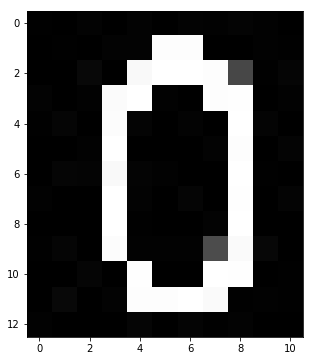

In [53]:
plt.imshow(img)

------------------

## Indexing

In [54]:
img[2,8]

71

## ROI

In [55]:
img[1:3, 7:10]

array([[  0,   0,   2],
       [253,  71,   1]], dtype=uint8)

## Manipulating GOP

In [56]:
img[1:3, 7:10]= 200

In [57]:
img

array([[  1,   0,   3,   0,   3,   0,   3,   2,   4,   2,   0],
       [  0,   1,   0,   3,   3, 253, 253, 200, 200, 200,   1],
       [  0,   0,   8,   0, 249, 255, 255, 200, 200, 200,   5],
       [  3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2],
       [  1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0],
       [  0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4],
       [  0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0],
       [  2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4],
       [  0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0],
       [  1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0],
       [  0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1],
       [  0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1],
       [  2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]],
      dtype=uint8)

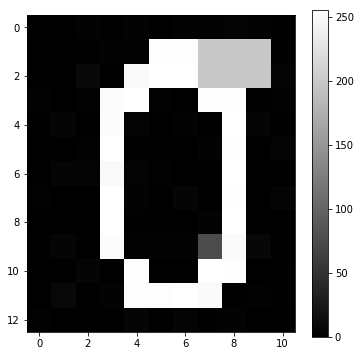

In [58]:
plt.imshow(img)
plt.colorbar()

## Save image to disk

In [59]:
cv2.imwrite("test.jpg", img)

True

Parameters:

filename - String providing the relative or absolute path where the image should be saved.
img - Image matrix to be saved.
params - Additional information, like specifying the JPEG compression quality etc. 

----------------------

# Color Images

In [60]:
img = cv2.imread("DATA/parrots.jpg")

In [61]:
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(422, 766, 3)
uint8


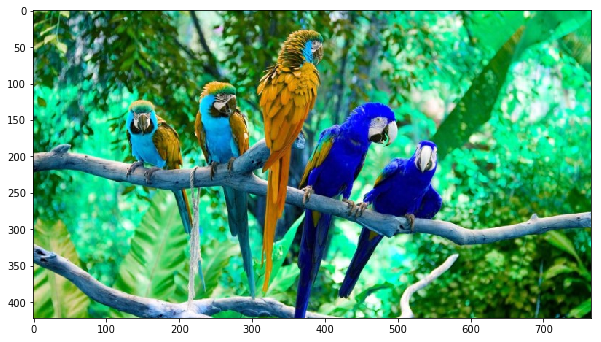

In [62]:
plt.figure(figsize=[10,10]);plt.imshow(img)

Matplotlib uses R-G-B

OpenCV uses B-G-R

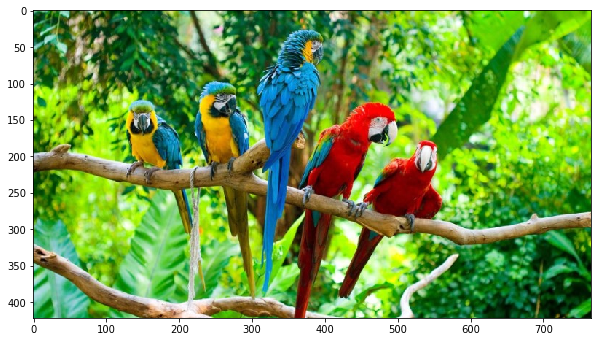

In [63]:
plt.figure(figsize=[10,10]);plt.imshow(img[:,:,::-1])
# plt.figure(figsize=[15,15]);plt.imshow(img[...,::-1])

Swap channels using OpenCV cv2.cvtColor() 

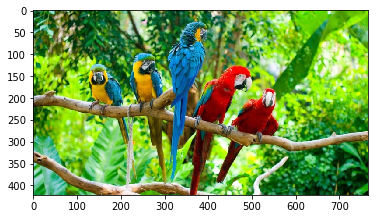

In [64]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(422, 766)
uint8


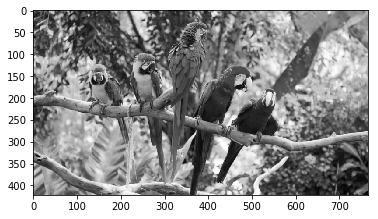

In [65]:
img_gray = cv2.imread('DATA/parrots.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
print(img_gray.shape)
print(img_gray.dtype)

-----------

## Resize Images

Parameters:

* src - input image
* dst - output resized image
* dsize - output image size
* fx - scale factor along the horizontal axis; 
* fy - scale factor along the vertical axis; Either dsize or both fx and fy must be non-zero.
* interpolation - interpolation method ( Bilinear / Bicubic etc ).

In [66]:
img_rgb.shape
# width, height, color channels

(422, 766, 3)

### 1. Resize by specifying the width and height

In [67]:
img =cv2.resize(img_rgb, (1300,275), interpolation= cv2.INTER_LINEAR)



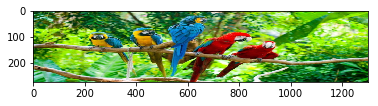

In [68]:
plt.imshow(img)

### 2. Resize by providing scaling factor

In [69]:
w_ratio = 0.5
h_ratio = 0.5

In [70]:
new_img =cv2.resize(img_rgb, None, fx= w_ratio, fy= h_ratio, interpolation= cv2.INTER_LINEAR)

(211, 383, 3)


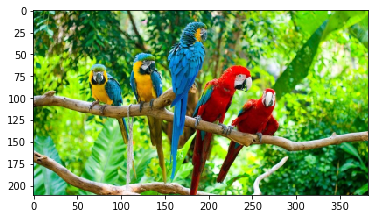

In [71]:
print(new_img.shape)
plt.imshow(new_img)

----------------

### Flipping Images

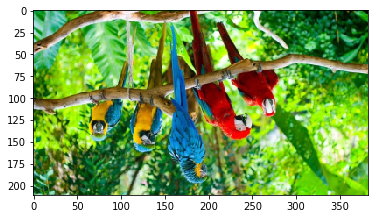

In [72]:
# Along central x axis
new_img = cv2.flip(new_img,0)
plt.imshow(new_img)

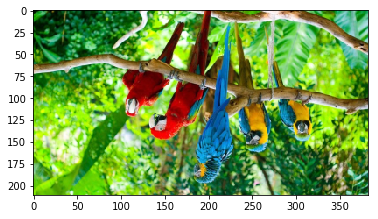

In [73]:
# Along central y axis
new_img = cv2.flip(new_img,1)
plt.imshow(new_img)

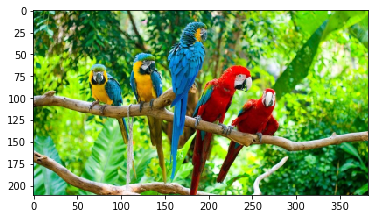

In [74]:
# Along both axis
new_img = cv2.flip(new_img,-1)
plt.imshow(new_img)

-------------

# Splitting and Merging channels

In [75]:
img = cv2.imread("DATA/parrots.jpg")

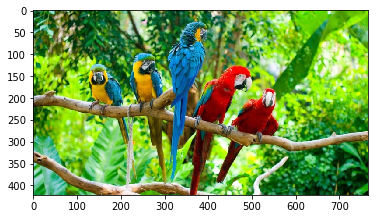

In [76]:
plt.imshow(img[...,::-1])

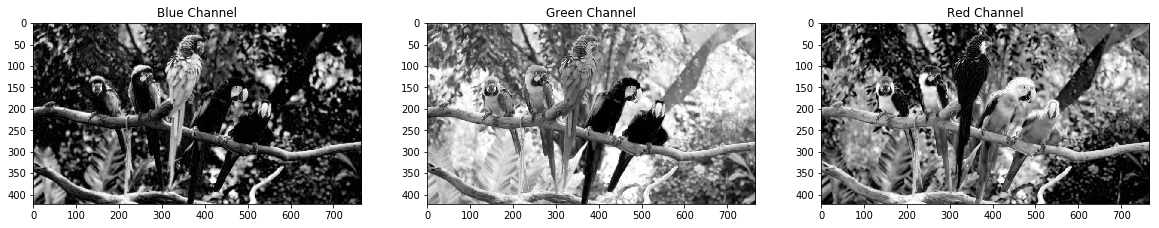

In [77]:
# Show the channels
plt.figure(figsize=[20,5])
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
plt.subplot(131);plt.imshow(b);plt.title("Blue Channel");
plt.subplot(132);plt.imshow(g);plt.title("Green Channel");
plt.subplot(133);plt.imshow(r);plt.title("Red Channel");

#### <font style = "color:rgb(8,133,37)">Note </font>
* A white pixel means a high intensity value. Look at the channels closely and compare them with the original image.
* This kind of information extraction can be very useful if you want to build basic applications which take decisions based on color.

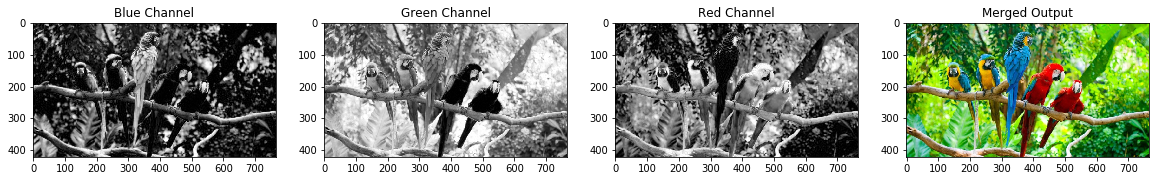

In [78]:
# Split the image into the B,G,R components
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(b);plt.title("Blue Channel");
plt.subplot(142);plt.imshow(g);plt.title("Green Channel");
plt.subplot(143);plt.imshow(r);plt.title("Red Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

---------------------

# Alpha channel

* In images with an alpha channel- each pixel not only has a color value but also has a numerical transparency value ( between 0 to 255) that defines what will happen when the pixel is placed over another pixel.
* There are 4 channels, i.e. 3 color channels and 1 alpha channel which indicates the transparency.

image Dimension =(608, 640, 4)


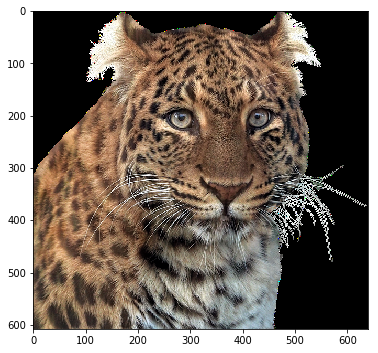

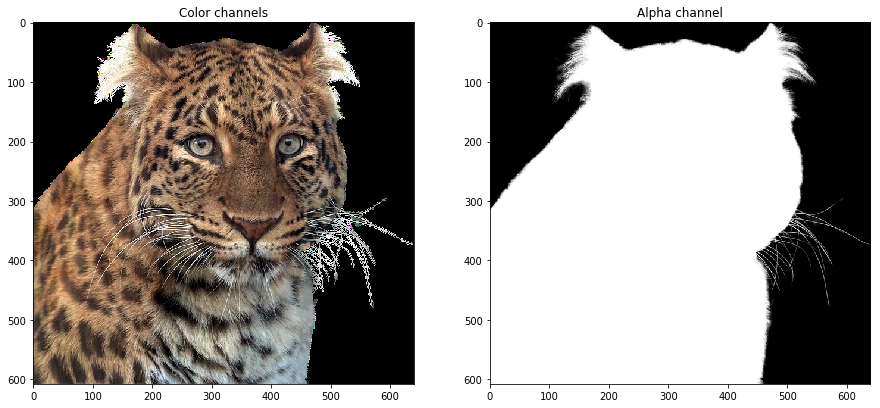

In [79]:
imagePath = "DATA/panther.png"

imgPNG = cv2.imread(imagePath,-1)
print("image Dimension ={}".format(imgPNG.shape))

imgRGB = cv2.cvtColor(imgPNG,cv2.COLOR_BGRA2RGB)
plt.imshow(imgRGB)

#First 3 channels will be combined to form BGR image
#Mask is the alpha channel of the original image
imgBGR = imgPNG[:,:,0:3]
imgMask = imgPNG[:,:,3]
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(imgBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(imgMask,cmap='gray');plt.title('Alpha channel');

---------------------------